In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import control as co
from control.matlab import *

In [2]:
# select gain for K1 and K2
# setting noise to 0
K1 = 0.01565
K2 = -0.04
dT = 0

In [3]:
# defining transfer function variable
s = tf('s')

In [4]:
# defining the second block
G1 = (s + 100)
G1

TransferFunction(array([  1, 100]), array([1]))

In [5]:
# series combination of K1 and G1 in the block diagram
sys1 = series(K1, G1)
sys1

TransferFunction(array([0.01565, 1.565  ]), array([1]))

In [6]:
# accumulator, summation of sys1 and noise dT
accumulator = sys1 + dT
accumulator

TransferFunction(array([0.01565, 1.565  ]), array([1.]))

In [7]:
sys2 = tf([1], [1/10, 1, 0, 0])
sys2

TransferFunction(array([1]), array([0.1, 1. , 0. , 0. ]))

In [8]:
sys4 = K2*s
sys4

TransferFunction(array([-0.04,  0.  ]), array([1]))

In [9]:
sys5 = feedback(sys2, sys4)
sys5

TransferFunction(array([1]), array([ 0.1 ,  1.  , -0.04,  0.  ]))

In [10]:
sys6 = series(accumulator, sys5)
sys6

TransferFunction(array([0.01565, 1.565  ]), array([ 0.1 ,  1.  , -0.04,  0.  ]))

In [11]:
# final system gain after implementing feedback
final_gain = feedback(sys6, 1)
final_gain

TransferFunction(array([0.01565, 1.565  ]), array([ 0.1    ,  1.     , -0.02435,  1.565  ]))

[0.00000000e+00 2.83733307e-05 1.46352997e-04 ... 9.75369963e+02
 9.73707044e+02 9.71666288e+02]
[0.00000000e+00 1.57840805e-02 3.15681611e-02 ... 7.88730505e+01
 7.88888346e+01 7.89046187e+01]
5000


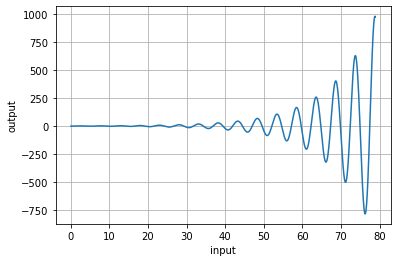

In [12]:
rT, yT = step(final_gain)
print(rT)
print(yT)
print(len(rT))

plt.plot(yT, rT)
plt.xlabel('input')
plt.ylabel('output')
plt.grid()

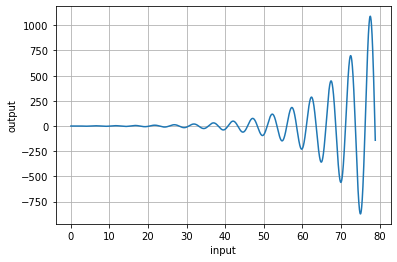

In [13]:
rT, yT = impulse(final_gain)
plt.plot(yT, rT)
plt.xlabel('input')
plt.ylabel('output')
plt.grid()

In [20]:
start = 0
stop = 2
step = 1

t = np.arange(start, stop, step)
yT, rT = step(final_gain, t)

plt.plot(yT, rT)
plt.xlabel('input')
plt.ylabel('output')
plt.grid()

TypeError: 'int' object is not callable

(array([ 1.00000000e+00,  1.00654693e+00,  1.00666958e+00,  1.00679454e+00,
         1.00692185e+00,  1.00705157e+00,  1.00718374e+00,  1.00731840e+00,
         1.00745560e+00,  1.00759540e+00,  1.00773784e+00,  1.00788297e+00,
         1.00803084e+00,  1.00818151e+00,  1.00833503e+00,  1.00849145e+00,
         1.00865084e+00,  1.00881324e+00,  1.00897872e+00,  1.00914733e+00,
         1.00931914e+00,  1.00949420e+00,  1.00967259e+00,  1.00985436e+00,
         1.01003958e+00,  1.01022831e+00,  1.01042063e+00,  1.01061661e+00,
         1.01081631e+00,  1.01101980e+00,  1.01122717e+00,  1.01143848e+00,
         1.01165381e+00,  1.01187325e+00,  1.01209687e+00,  1.01232475e+00,
         1.01255697e+00,  1.01279363e+00,  1.01303480e+00,  1.01328058e+00,
         1.01353105e+00,  1.01378631e+00,  1.01404645e+00,  1.01431157e+00,
         1.01458177e+00,  1.01485714e+00,  1.01513779e+00,  1.01542382e+00,
         1.01571533e+00,  1.01601245e+00,  1.01631527e+00,  1.01662391e+00,
         1.0

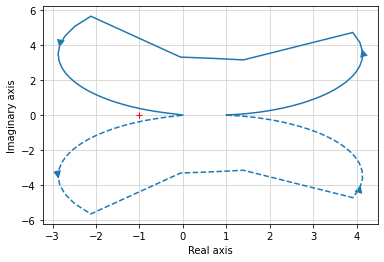

In [14]:
# showing nyquist plot
nyquist(final_gain)